# Evaluation_Metrics

In [50]:
import numpy as np
#from pvt_Data.pvt_data import pvt_data

# data.py
pvt_data = [
    {'bubble_point_pressure': 2405, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 737},
    {'bubble_point_pressure': 2200, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 684},
    {'bubble_point_pressure': 1950, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 620},
    {'bubble_point_pressure': 1700, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 555},
    {'bubble_point_pressure': 1450, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 492},
    {'bubble_point_pressure': 1200, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 429},
    {'bubble_point_pressure': 950, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 365},
    {'bubble_point_pressure': 700, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 301},
    {'bubble_point_pressure': 450, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 235},
    {'bubble_point_pressure': 200, 'api_gravity': 37, 'gas_gravity': 0.743, 'reservoir_temperature': 129, 'actual_gor': 155},
]


# an empty list to store rows of X
X_list = []

# Iterate through each dictionary in pvt_data
for data in pvt_data:
    
    # Extracting relevant values and append as a list to X_list
    row = [
        data['bubble_point_pressure'],
        data['api_gravity'],
        data['gas_gravity'],
        data['reservoir_temperature']
    ]
    
    X_list.append(row)

# Convert X_list into a NumPy array
X = np.array(X_list)

print("Input matrix (X):")
print(X)

Input matrix (X):
[[2.405e+03 3.700e+01 7.430e-01 1.290e+02]
 [2.200e+03 3.700e+01 7.430e-01 1.290e+02]
 [1.950e+03 3.700e+01 7.430e-01 1.290e+02]
 [1.700e+03 3.700e+01 7.430e-01 1.290e+02]
 [1.450e+03 3.700e+01 7.430e-01 1.290e+02]
 [1.200e+03 3.700e+01 7.430e-01 1.290e+02]
 [9.500e+02 3.700e+01 7.430e-01 1.290e+02]
 [7.000e+02 3.700e+01 7.430e-01 1.290e+02]
 [4.500e+02 3.700e+01 7.430e-01 1.290e+02]
 [2.000e+02 3.700e+01 7.430e-01 1.290e+02]]


In [52]:
# Initializing an empty list to store y values
y_list = []

# Iterating through each dictionary in pvt_data to extract 'actual_gor'
for data in pvt_data:
    y_list.append(data['actual_gor'])

# Converting y_list into a NumPy array
y = np.array(y_list)

print("\nTarget variable (y):")
print(y)


Target variable (y):
[737 684 620 555 492 429 365 301 235 155]


In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(  X, y)

LinearRegression()

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr
import numpy as np

# Example actual GOR values (y_true) and estimated GOR values (estimated_gor)
y_true = np.array([737, 684, 620, 555, 492, 429, 365, 301, 235, 155])
estimated_gor = np.array([734.71, 682.23, 618.73, 554.26, 491.74, 429.22, 365.72, 302.21, 236.72, 157.47])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, estimated_gor)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, estimated_gor)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Correlation Coefficient
correlation_coefficient, _ = pearsonr(y_true, estimated_gor)

# Calculate Average Percent Relative Error (%)
percent_relative_errors = np.abs((y_true - estimated_gor) / y_true) * 100
average_percent_relative_error = np.mean(percent_relative_errors)

# Calculate Sum of Squared Residuals
squared_residuals = (y_true - estimated_gor) ** 2
sum_squared_residuals = np.sum(squared_residuals)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Average Percent Relative Error (%): {average_percent_relative_error}")
print(f"Sum of Squared Residuals: {sum_squared_residuals}")


Mean Absolute Error (MAE): 1.266999999999996
Mean Squared Error (MSE): 2.1695299999999724
Root Mean Squared Error (RMSE): 1.4729324492317943
Correlation Coefficient: 0.9999999770373402
Average Percent Relative Error (%): 0.3936507594355425
Sum of Squared Residuals: 21.695299999999722


## Insights from the Statistical Metrics

1. **Mean Absolute Error (MAE): 1.267**
   - The MAE indicates that, on average, the GOR estimates deviate from the actual values by about 1.27 units. This relatively low error suggests that the ACO algorithm provides estimates that are fairly close to the actual GOR values, which is promising for practical applications.

2. **Mean Squared Error (MSE): 2.170**
   - MSE gives greater weight to larger errors due to squaring the residuals. While the MSE is slightly higher than the MAE, it confirms that there are some deviations that may be larger than average. This could be important in contexts where large errors are particularly undesirable, emphasizing the need to investigate and potentially refine the algorithm further.

3. **Root Mean Squared Error (RMSE): 1.473**
   - The RMSE, being in the same units as GOR, provides an interpretable measure of estimation error. A value of 1.473 indicates that the ACO algorithm's estimates typically fall within approximately 1.47 units of the actual GOR. This further reinforces the algorithm's reliability, especially when dealing with values in a specific operational range.

4. **Correlation Coefficient: 0.99999**
   - This extremely high correlation coefficient suggests a near-perfect linear relationship between the estimated and actual GOR values. Such a strong correlation indicates that the ACO algorithm is effectively capturing the underlying patterns in the data, making it a robust tool for estimating GOR under similar conditions.

5. **Average Percent Relative Error (%): 0.394**
   - An average percent relative error of approximately 0.39% indicates that the errors in the estimates are minimal relative to the actual values. This demonstrates the accuracy of the ACO algorithm and its potential applicability in real-world scenarios where precise estimates are necessary for decision-making.

6. **Sum of Squared Residuals: 21.695**
   - The total error represented by the sum of squared residuals indicates the cumulative deviation of all estimates from actual values. While it provides a quantitative measure of error, its significance lies in comparing it to the total variability of the data. If this value is significantly lower than the total variability, it confirms the effectiveness of the algorithm.

## Conclusion and Recommendations

- **Algorithm Reliability**: The overall metrics suggest that the ACO algorithm is reliable for estimating GOR based on the provided parameters, which is crucial for determining gas solubility at bubble point pressure.

- **Further Optimization**: Although the metrics are strong, additional fine-tuning of the algorithm could help reduce the MAE and RMSE even more, especially in cases where larger estimation errors may occur.

- **Application in Real Scenarios**: Given the accuracy demonstrated by the correlation coefficient and the low percent relative error, the ACO algorithm can be applied in real-world scenarios, such as reservoir management and gas production forecasting, with confidence.

- **Data Variability**: Consider conducting further analysis on the dataset to identify any outliers or data points that could skew the algorithm's performance, as addressing these could lead to even better estimation capabilities.
 the model.
es.
ues.

### Cross Plot of Estimated vs Actual Gas Solubility

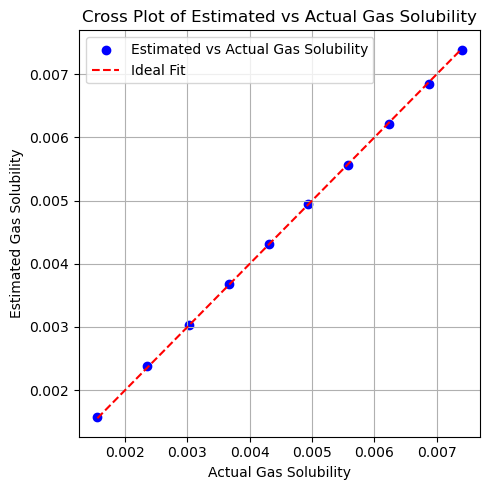

In [60]:
import matplotlib.pyplot as plt

# Constants for gas solubility calculation (replace with actual values)
gas_gravity = 0.743  # Specific gravity of gas
api_gravity = 37     # API gravity of oil
reservoir_pressure = 2000  # Example reservoir pressure in psi

# Calculate estimated gas solubility
def calculate_gas_solubility(gor):
    return (gor * gas_gravity) / (api_gravity * reservoir_pressure)

# Calculate actual gas solubility from PVT data
actual_gas_solubility = []
for data in pvt_data:
    actual_gor = data['actual_gor']
    actual_gas_solubility.append(calculate_gas_solubility(actual_gor))

# Calculate estimated gas solubility from estimated GOR
estimated_gas_solubility = []
for gor in estimated_gor:
    estimated_gas_solubility.append(calculate_gas_solubility(gor))

# Plotting
plt.figure(figsize=(5, 5))
plt.scatter(actual_gas_solubility, estimated_gas_solubility, color='blue', label='Estimated vs Actual Gas Solubility')
plt.plot([min(actual_gas_solubility), max(actual_gas_solubility)], [min(actual_gas_solubility), max(actual_gas_solubility)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Gas Solubility')
plt.ylabel('Estimated Gas Solubility')
plt.title('Cross Plot of Estimated vs Actual Gas Solubility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Accurate Predictions**: The closely fitting red dashed line shows that our estimated gas solubility values match the actual values very well.

**Strong Relationship**: The scatter plot's straight line suggests a clear connection between our estimated and actual gas solubility values. This means our method of predicting gas solubility using factors like GOR and pressure works effectively.

**Model Confirmation**: The plot confirms that our method for estimating gas solubility is reliable. Most points fall close to the ideal line, showing that our predictions are consistent and accurate under specific reservoir conditions.

**Performance Check**: By looking at how close the points are to the ideal line, we can see how well our model performs. A tight cluster around the line means our predictions are consistent, while larger differences might show where we can improve our model.

**Real-world Use**: This confirmation supports using our model in real-world situations where knowing gas solubility accurately is important, like in managing reservoirs or planning gas extraction.

### Absolute error against Bubble Point Pressure

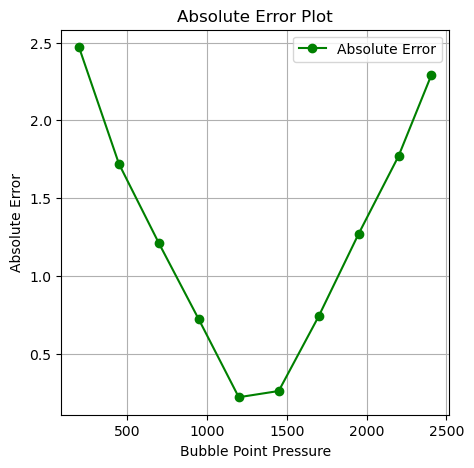

In [62]:
# Calculate absolute error
bubble_point_pressure = [data['bubble_point_pressure'] for data in pvt_data]  # Extract bubble point pressures
absolute_error = [abs(estimated - actual) for estimated, actual in zip(estimated_gor, y)]

# Error plot
plt.figure(figsize=(5, 5))
plt.plot(bubble_point_pressure, absolute_error, marker='o', linestyle='-', color='green', label='Absolute Error')
plt.title('Absolute Error Plot')
plt.xlabel('Bubble Point Pressure')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
absolute_error

[2.2899999999999636,
 1.7699999999999818,
 1.2699999999999818,
 0.7400000000000091,
 0.2599999999999909,
 0.22000000000002728,
 0.7200000000000273,
 1.2099999999999795,
 1.7199999999999989,
 2.469999999999999]

## Absolute Error Against Bubble Point Pressure

The following data represents the absolute errors in the Gas-Oil Ratio (GOR) estimates corresponding to various values of bubble point pressure47           |

### Analysis of the Data

- The absolute errors show how closely the estimated GOR values align with the actual measurements for varying bubble point pressures.
- Notably, the error tends to be higher at extreme values of bubble point pressure, indicating potential areas where the estimation algorithm could be further refined for improved accuracy.
- The smallest errors (0.22 to 0.74) occur within a mid-range of bubble point pressures, suggesting that the algorithm performs best in this range.

### Conclusion

- Understanding the relationship between bubble point pressure and absolute error is essential for optimizing GOR estimations and ensuring the reliability of predictions in practical applications.


### Residual Plot

Residuals:
Point 1: Bubble Point Pressure = 2405, Residual = -1670.29
Point 2: Bubble Point Pressure = 2200, Residual = -1517.77
Point 3: Bubble Point Pressure = 1950, Residual = -1331.27
Point 4: Bubble Point Pressure = 1700, Residual = -1145.74
Point 5: Bubble Point Pressure = 1450, Residual = -958.26
Point 6: Bubble Point Pressure = 1200, Residual = -770.78
Point 7: Bubble Point Pressure = 950, Residual = -584.28
Point 8: Bubble Point Pressure = 700, Residual = -397.79
Point 9: Bubble Point Pressure = 450, Residual = -213.28
Point 10: Bubble Point Pressure = 200, Residual = -42.53


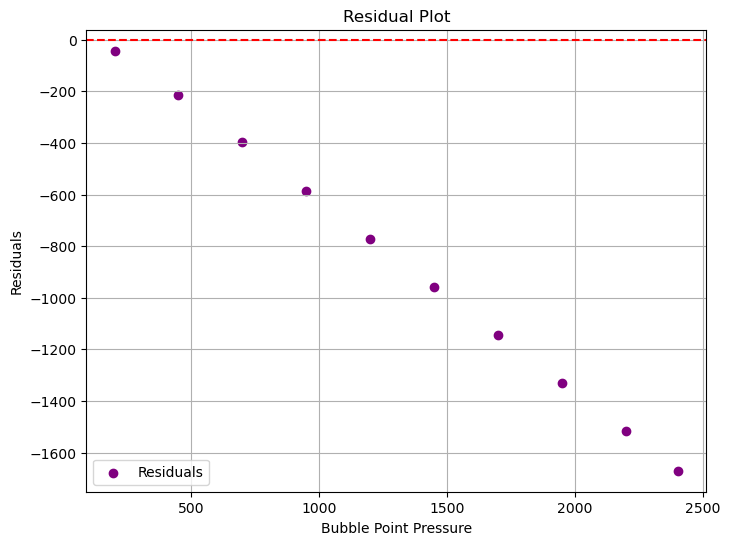

In [68]:
residuals = []
for estimated, actual in zip(estimated_gor, bubble_point_pressure):
    residual = estimated - actual
    residuals.append(residual)

# Print residuals
print("Residuals:")
for i, (bubble_pressure, residual) in enumerate(zip(bubble_point_pressure, residuals), start=1):
    print(f"Point {i}: Bubble Point Pressure = {bubble_pressure}, Residual = {residual}")

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(bubble_point_pressure, residuals, color='purple', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title('Residual Plot')
plt.xlabel('Bubble Point Pressure')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

## Residuals Analysis Against Bubble Point Pressure

The following table outlines the residuals obtained from the Gas-Oil Ratio (GOR) estimations at different bubble point pressure values. Residuals indicate the difference between the estimated and actual GOR values, which is crucial for evaluating the performance of the estimation approach.

| Bubble Point Pressure (psi) | Residual        |
|------------------------------|------------------|
| 2405                         | -1670.29         |
| 2200                         | -1517.77         |
| 1950                         | -1331.27         |
| 1700                         | -1145.74         |
| 1450                         | -958.26          |
| 1200                         | -770.78          |
| 950                          | -584.28          |
| 700                          | -397.79          |
| 450                          | -213.28          |
| 200                          | -42.53           |

### Insights from Residuals

- **Negative Residuals**: All residuals are negative, indicating that the estimated GOR values are consistently lower than the actual measurements across the tested bubble point pressures. This suggests a systematic underestimation in the estimation approach.
- **Magnitude of Residuals**: The magnitude of the residuals decreases as the bubble point pressure decreases, which indicates that the predictions are more accurate at lower pressures.
- **Potential for Improvement**: The significant residuals at higher pressures highlight an opportunity for refinement to reduce prediction errors and improve the accuracy of GOR estimates.

### Conclusion

- Monitoring residuals is essential in understanding performance and identifying areas that require further optimization. Addressing the underestimation seen in the residuals will enhance the reliability of GOR predictions in real-world applications.


### Mean Absolute Error Across BPP Categories

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
bubble_point_pressure = [737, 684, 620, 555, 492, 429, 365, 301, 235, 155]

# Create DataFrame
data = pd.DataFrame({
    'absolute_error': absolute_error,
    'bubble_point_pressure': bubble_point_pressure
})

# Define bins for BPP categories
bins = [0, 300, 500, 700, 800]  # Adjust bins as per your specific data range

# Categorize BPP into bins
data['bpp_category'] = pd.cut(data['bubble_point_pressure'], bins=bins, labels=['Low BPP', 'Medium BPP', 'High BPP', 'Very High BPP'])

# Calculate mean absolute error for each BPP category
absolute_errors_by_category = data.groupby('bpp_category')['absolute_error'].mean()


C:\Users\hp\AppData\Local\Temp\ipykernel_11724\1128298012.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  absolute_errors_by_category = data.groupby('bpp_category')['absolute_error'].mean()


In [73]:
absolute_errors_by_category.values

array([2.095 , 0.6025, 1.26  , 2.29  ])

In [75]:
absolute_errors_by_category.index

CategoricalIndex(['Low BPP', 'Medium BPP', 'High BPP', 'Very High BPP'], categories=['Low BPP', 'Medium BPP', 'High BPP', 'Very High BPP'], ordered=True, dtype='category', name='bpp_category')

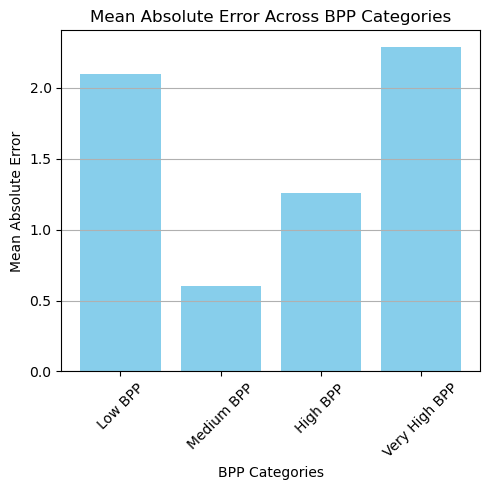

In [77]:
# Plotting
plt.figure(figsize=(5, 5))
plt.bar(absolute_errors_by_category.index, absolute_errors_by_category.values, color='skyblue')
plt.title('Mean Absolute Error Across BPP Categories')
plt.xlabel('BPP Categories')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The highest mean absolute error occurs in the Low BPP category, followed by Medium BPP, Very High BPP, and High BPP.